In [4]:
import numpy as np 
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt

import sklearn
import tensorflow as tf 
import keras
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,GRU
# from sklearn.metrics import mean_absolute_error,mean_squared_error

ModuleNotFoundError: No module named 'google'

In [178]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_pred - y_true)))

def lstm_model(len, dim):
    model = Sequential()
    model.add(LSTM(64, input_shape = (len, dim), return_sequences = True))
    model.add(Dropout(0.3))
    model.add(LSTM(32, input_shape = (len, dim), return_sequences = False))
    model.add(Dropout(0.3))   
    model.add(Dense(1, activation = "linear"))
    model.compile(loss = "mse", optimizer = "adam")
    return model 


def lstm_stock_model(shape):
    model = Sequential()
    model.add(LSTM(256, input_shape = (shape[1], 1), return_sequences = True))
    model.add(LSTM(256, return_sequences=True))
    model.add(keras.layers.TimeDistributed(Dense(1)))
    model.add(keras.layers.Flatten())
    model.add(Dense(5,activation='linear'))
    model.add(Dense(1))
    model.compile(loss = "mean_absolute_error", optimizer = "adam", metrics = ['mean_absolute_error'])
    model.summary()
    return model

In [179]:
data = pd.read_csv("data_2330.csv")
pred = data["close"]
variables = data
print(pred)
print(variables)

0      614.04
1      638.37
2      632.53
3      626.69
4      616.96
        ...  
329    530.00
330    532.00
331    531.00
332    530.00
333    525.00
Name: close, Length: 334, dtype: float64
     Trading_Volume  Trading_money     max     min   close  spread  \
0          73703302    46249716919  615.02  601.39  614.04   15.57   
1          90945643    59188199534  638.37  626.69  638.37   24.33   
2          72505550    47582832784  651.02  628.64  632.53   -5.84   
3          57490736    36817638522  628.64  618.91  626.69   -5.84   
4          39847766    25358237656  628.64  615.02  616.96   -9.73   
..              ...            ...     ...     ...     ...     ...   
329        46107848    24437734052  536.00  526.00  530.00   11.00   
330        34742592    18476363730  535.00  529.00  532.00    2.00   
331        19037508    10100912410  533.00  529.00  531.00   -1.00   
332        20126817    10638352410  531.00  525.00  530.00   -1.00   
333        22621221    11888325332 

In [180]:
# Normalize
scaler_pred = sklearn.preprocessing.MinMaxScaler(feature_range = (0, 1))
pred = scaler_pred.fit_transform(pred.to_frame())
scaler = sklearn.preprocessing.MinMaxScaler(feature_range = (0, 1))
variables = scaler.fit_transform(variables)

print(pred)
print(variables)

[[0.8300309 ]
 [0.911741  ]
 [0.89212789]
 [0.87251478]
 [0.83983745]
 [0.86925712]
 [0.89541913]
 [0.92480521]
 [0.92809645]
 [0.96403143]
 [1.        ]
 [0.93135411]
 [0.90522569]
 [0.89541913]
 [0.86274181]
 [0.90193444]
 [0.86274181]
 [0.84638635]
 [0.84312869]
 [0.82022434]
 [0.8365798 ]
 [0.88887023]
 [0.89212789]
 [0.84964401]
 [0.8365798 ]
 [0.87906368]
 [0.87580602]
 [0.84964401]
 [0.83332214]
 [0.81696668]
 [0.81045137]
 [0.74180548]
 [0.74180548]
 [0.74180548]
 [0.73199893]
 [0.73525658]
 [0.71238581]
 [0.65028882]
 [0.60780494]
 [0.6241604 ]
 [0.68625739]
 [0.64703117]
 [0.63722461]
 [0.59148307]
 [0.60048361]
 [0.67933907]
 [0.67604782]
 [0.69247045]
 [0.68259672]
 [0.70560183]
 [0.70889307]
 [0.73186459]
 [0.68588796]
 [0.70231059]
 [0.73844707]
 [0.72857335]
 [0.70231059]
 [0.6661741 ]
 [0.62677996]
 [0.6300712 ]
 [0.60048361]
 [0.59722595]
 [0.64975148]
 [0.64975148]
 [0.61364858]
 [0.61035733]
 [0.62348872]
 [0.63991134]
 [0.62348872]
 [0.60048361]
 [0.56438071]
 [0.56

In [181]:
split = 0.95
x_, y_ = variables[0:int(split * len(variables))], pred[0:int(split * len(variables))]
x_test, y_test   = variables[int(split * len(variables)):], pred[int(split * len(variables)):]

split = 0.8
x_train, y_train = x_[:int(split * len(x_))], y_[:int(split * len(x_))]
x_train = np.reshape(x_train, (253, 37))
y_train = np.reshape(y_train, (253,))
x_valid, y_valid = x_[int(split * len(x_)):], y_[int(split * len(x_)):]
x_valid = np.reshape(x_valid, (64, 37))
y_valid = np.reshape(y_valid, (64,))

print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(253, 37)
(253,)
(64, 37)
(64,)


In [182]:
# lstm_model = lstm_model(253, 37) 
# history = lstm_model.fit(x_train, y_train, batch_size = 30, shuffle = True, epochs = 1000, validation_data = (x_vaild, y_vaild))
# lstm_model.summary()

Epoch 1/1000


ValueError: in user code:

    File "c:\Users\abc89\anaconda3\envs\tensorflowenv\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\abc89\anaconda3\envs\tensorflowenv\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\abc89\anaconda3\envs\tensorflowenv\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\abc89\anaconda3\envs\tensorflowenv\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\abc89\anaconda3\envs\tensorflowenv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\abc89\anaconda3\envs\tensorflowenv\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_31" is incompatible with the layer: expected shape=(None, 253, 37), found shape=(None, 37)


In [183]:
lstm_model = lstm_stock_model(x_train.shape) 
history = lstm_model.fit(x_train, y_train, batch_size = 10, shuffle = True, epochs = 300, validation_data = (x_valid, y_valid))
lstm_model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_49 (LSTM)              (None, 37, 256)           264192    
                                                                 
 lstm_50 (LSTM)              (None, 37, 256)           525312    
                                                                 
 time_distributed_12 (TimeDi  (None, 37, 1)            257       
 stributed)                                                      
                                                                 
 flatten_12 (Flatten)        (None, 37)                0         
                                                                 
 dense_48 (Dense)            (None, 5)                 190       
                                                                 
 dense_49 (Dense)            (None, 1)                 6         
                                                     

In [186]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\abc89\anaconda3\envs\tensorflowenv\lib\site-packages\IPython\core\formatters.py", line 222, in catch_format_error
    try:
  File "c:\Users\abc89\anaconda3\envs\tensorflowenv\lib\site-packages\IPython\core\formatters.py", line 339, in __call__
    else:
  File "c:\Users\abc89\anaconda3\envs\tensorflowenv\lib\site-packages\IPython\core\pylabtools.py", line 151, in print_figure
  File "c:\Users\abc89\anaconda3\envs\tensorflowenv\lib\site-packages\matplotlib\backend_bases.py", line 2319, in print_figure
    ExitStack() as stack:
  File "c:\Users\abc89\anaconda3\envs\tensorflowenv\lib\site-packages\matplotlib\backend_bases.py", line 1648, in wrapper
    events = [
  File "c:\Users\abc89\anaconda3\envs\tensorflowenv\lib\site-packages\matplotlib\_api\deprecation.py", line 412, in wrapper
    DECORATORS[wrapper] = decorator
  File "c:\Users\abc89\anaconda3\envs\tensorflowenv\lib\site-packages\matplotlib\backends\backend_agg.py", line 541, in

<Figure size 432x288 with 1 Axes>

In [7]:
lstm_train = lstm_model.predict(x_train)
lstm_val = lstm_model.predict(x_valid)
lstm_test = lstm_model.predict(x_test)

pre = lstm_model.predict(x_train)
pre_val = lstm_model.predict(x_valid)
fc = np.concatenate((pre, pre_val))
y_true = np.concatenate((y_train, y_valid))
plt.figure(facecolor = 'white')
plt.plot(fc.reshape(-1), color = 'blue', label = 'Predict')
plt.plot(y_true.reshape(-1), color = 'red', label = 'Original')
plt.legend()
display(plt)
# plt.show()

NameError: name 'lstm_model' is not defined

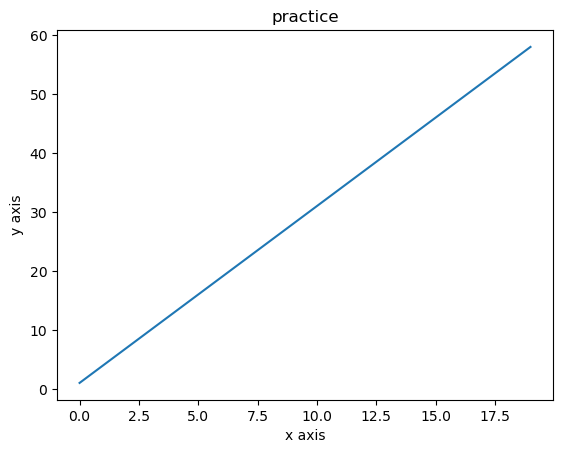

In [6]:
x = np.arange(20) # x軸的值
y = 3 * x + 1  # y軸的值

plt.title("practice") # 圖的標題
plt.xlabel("x axis") # x軸的名稱
plt.ylabel("y axis") # y軸的名稱
plt.plot(x,y) # 繪製x,y軸的圖
plt.show() # 顯現圖形